In [147]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [148]:
_split = 0.7

## Arima for VCB dataset

In [149]:
data_path = '../../Dataset/VCB.csv';

In [150]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [151]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2339 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2339 non-null   float64
dtypes: float64(1)
memory usage: 36.5 KB
None
              Close
count   2339.000000
mean   49573.071881
std    22421.327527
min    15680.371094
25%    25332.525391
50%    50432.792969
75%    66027.140625
max    97400.000000


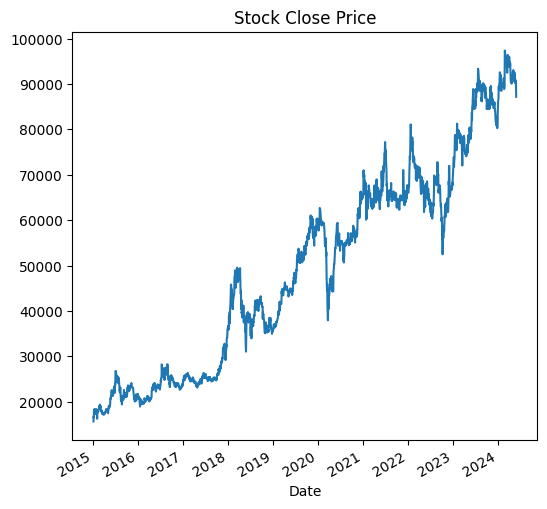

In [152]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [153]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [154]:
train_data

,Close
Date,
2015-01-05,15680.371094
2015-01-06,16712.621094
2015-01-07,16516.001953
2015-01-08,17007.550781
2015-01-09,18138.109375
...,...
2021-07-21,65695.351562
2021-07-22,66558.015625
2021-07-23,64368.171875


In [155]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1637, 1)
Test set shape: (702, 1)


In [156]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -0.7272181228151362
Initial p-value: 0.8395729143966156
Differencing Level: 1
ADF Statistic: -29.724375692103642
p-value: 0.0
Series became stationary after 1 differencing levels.


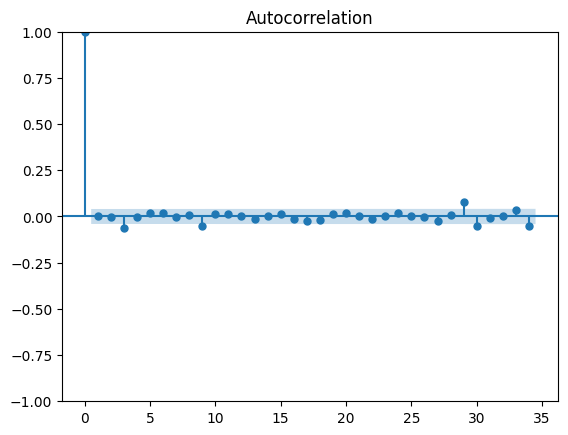

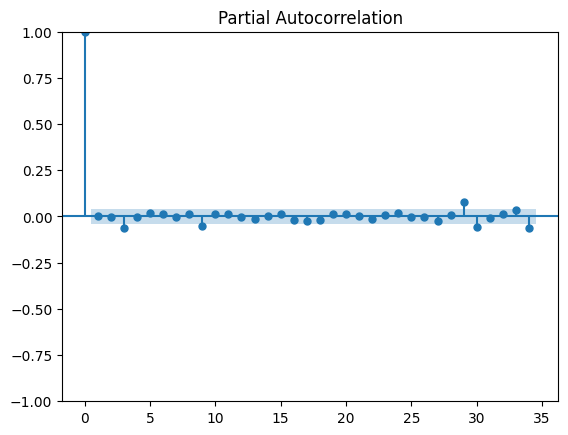

In [157]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [158]:
model = ARIMA(train_data, order=(3, 1, 3))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [159]:
model_fit = model.fit()

In [160]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1637
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -13236.292
Date:                Thu, 13 Jun 2024   AIC                          26486.583
Time:                        22:49:28   BIC                          26524.383
Sample:                             0   HQIC                         26500.604
                               - 1637                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2765      0.442      0.625      0.532      -0.590       1.143
ar.L2         -0.7521      0.141     -5.332      0.000      -1.029      -0.476
ar.L3         -0.0750      0.362     -0.207      0.8

In [161]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [162]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_13224\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2021-07-28,64368.171875,63325.457409
2021-07-29,64965.402344,63410.343112
2021-07-30,65031.757812,63241.602231
2021-08-02,64368.171875,63112.161682
2021-08-03,65562.632812,63196.916523
...,...,...
2024-05-27,90200.000000,63244.032200
2024-05-28,90700.000000,63244.032200
2024-05-29,89800.000000,63244.032200


In [163]:
start = len(data) + 1
end = len(data) + 30
predict_30_days = model_fit.predict(start=start, end=end)
predict_30_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2340    63244.0322
2341    63244.0322
2342    63244.0322
2343    63244.0322
2344    63244.0322
2345    63244.0322
2346    63244.0322
2347    63244.0322
2348    63244.0322
2349    63244.0322
2350    63244.0322
2351    63244.0322
2352    63244.0322
2353    63244.0322
2354    63244.0322
2355    63244.0322
2356    63244.0322
2357    63244.0322
2358    63244.0322
2359    63244.0322
2360    63244.0322
2361    63244.0322
2362    63244.0322
2363    63244.0322
2364    63244.0322
2365    63244.0322
2366    63244.0322
2367    63244.0322
2368    63244.0322
2369    63244.0322
Name: predicted_mean, dtype: float64

In [164]:
predict_60_days = model_fit.predict(start=end, end=end+30)
predict_90_days = model_fit.predict(start=end+30, end=end+60)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [165]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [166]:
predict_30_days = pd.Series(predict_30_days.values, index=generate_date_array(test_data.index[-1], 30))
predict_30_days.index.name = 'Date'
predict_30_days

Date
2024-05-31    63244.0322
2024-06-03    63244.0322
2024-06-04    63244.0322
2024-06-05    63244.0322
2024-06-06    63244.0322
2024-06-07    63244.0322
2024-06-10    63244.0322
2024-06-11    63244.0322
2024-06-12    63244.0322
2024-06-13    63244.0322
2024-06-14    63244.0322
2024-06-17    63244.0322
2024-06-18    63244.0322
2024-06-19    63244.0322
2024-06-20    63244.0322
2024-06-21    63244.0322
2024-06-24    63244.0322
2024-06-25    63244.0322
2024-06-26    63244.0322
2024-06-27    63244.0322
2024-06-28    63244.0322
2024-07-01    63244.0322
2024-07-02    63244.0322
2024-07-03    63244.0322
2024-07-04    63244.0322
2024-07-05    63244.0322
2024-07-08    63244.0322
2024-07-09    63244.0322
2024-07-10    63244.0322
2024-07-11    63244.0322
dtype: float64

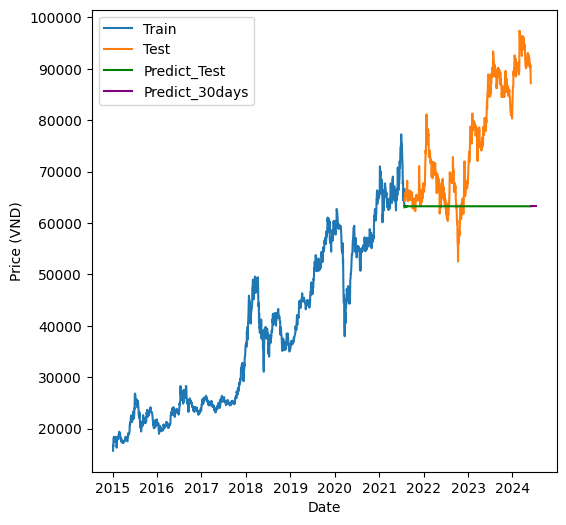

In [167]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='purple')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.show()

In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 16443.358
MAE: 12772.241
MAPE: 15.352


## Arima for BID dataset

In [169]:
data_path = '../../Dataset/BID.csv';

In [170]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [171]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2345 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB
None
              Close
count   2345.000000
mean   25785.842410
std    10557.656795
min     9101.712891
25%    15240.078125
50%    26740.693359
75%    32138.220703
max    54400.000000


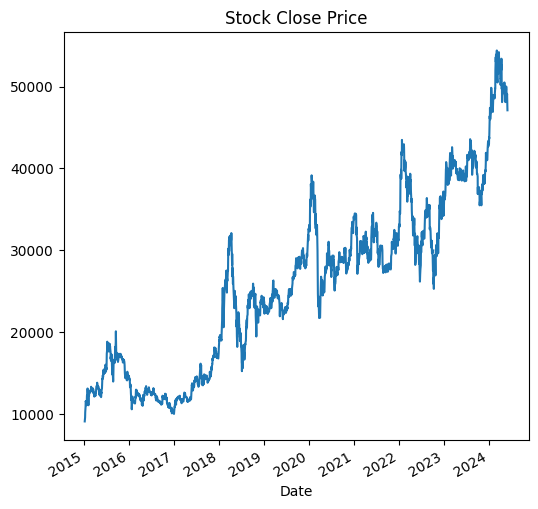

In [172]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [173]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [174]:
train_data

,Close
Date,
2015-01-05,9101.712891
2015-01-06,9313.380859
2015-01-07,9595.604492
2015-01-08,9595.604492
2015-01-09,10230.608398
...,...
2021-07-27,28363.478516
2021-07-28,28575.146484
2021-07-29,28927.925781


In [175]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1641, 1)
Test set shape: (704, 1)


In [176]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -1.0662395859139857
Initial p-value: 0.7283457408139377
Differencing Level: 1
ADF Statistic: -50.07262520728113
p-value: 0.0
Series became stationary after 1 differencing levels.


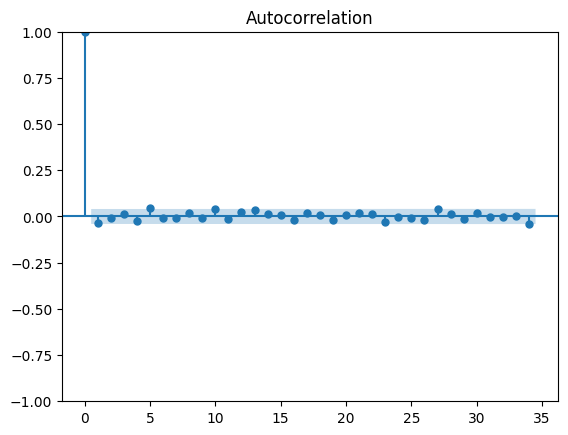

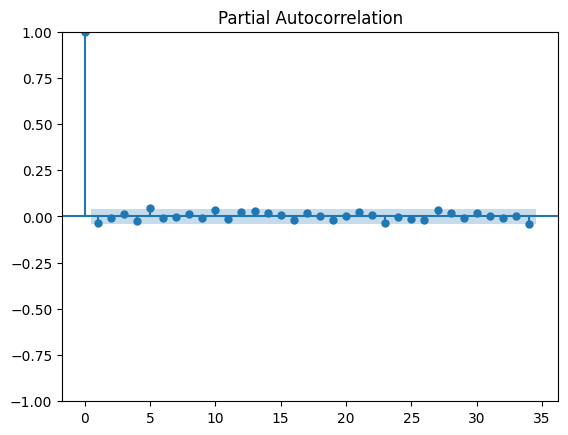

In [177]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [178]:
model = ARIMA(train_data, order=(3, 1, 3))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [179]:
model_fit = model.fit()

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [180]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1641
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -12622.300
Date:                Thu, 13 Jun 2024   AIC                          25258.600
Time:                        22:49:30   BIC                          25296.417
Sample:                             0   HQIC                         25272.625
                               - 1641                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1447      0.174     -0.834      0.404      -0.485       0.195
ar.L2          0.1234      0.153      0.806      0.420      -0.177       0.424
ar.L3          0.7329      0.119      6.151      0.0

In [181]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [182]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_13224\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2021-08-03,30585.990234,30125.451544
2021-08-04,30339.044922,30043.897030
2021-08-05,30303.765625,30093.025060
2021-08-06,30268.488281,30122.539479
2021-08-09,30444.878906,30064.562911
...,...,...
2024-05-27,48900.000000,30133.986831
2024-05-28,49100.000000,30133.986831
2024-05-29,48600.000000,30133.986831


In [183]:
start = len(data) + 1
end = len(data) + 30
predict_30_days = model_fit.predict(start=start, end=end)
predict_30_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2346    30133.986831
2347    30133.986831
2348    30133.986831
2349    30133.986831
2350    30133.986831
2351    30133.986831
2352    30133.986831
2353    30133.986831
2354    30133.986831
2355    30133.986831
2356    30133.986831
2357    30133.986831
2358    30133.986831
2359    30133.986831
2360    30133.986831
2361    30133.986831
2362    30133.986831
2363    30133.986831
2364    30133.986831
2365    30133.986831
2366    30133.986831
2367    30133.986831
2368    30133.986831
2369    30133.986831
2370    30133.986831
2371    30133.986831
2372    30133.986831
2373    30133.986831
2374    30133.986831
2375    30133.986831
Name: predicted_mean, dtype: float64

In [184]:
predict_60_days = model_fit.predict(start=end, end=end+30)
predict_90_days = model_fit.predict(start=end+30, end=end+60)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [185]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [186]:
predict_30_days = pd.Series(predict_30_days.values, index=generate_date_array(test_data.index[-1], 30))
predict_30_days.index.name = 'Date'
predict_30_days

Date
2024-05-31    30133.986831
2024-06-03    30133.986831
2024-06-04    30133.986831
2024-06-05    30133.986831
2024-06-06    30133.986831
2024-06-07    30133.986831
2024-06-10    30133.986831
2024-06-11    30133.986831
2024-06-12    30133.986831
2024-06-13    30133.986831
2024-06-14    30133.986831
2024-06-17    30133.986831
2024-06-18    30133.986831
2024-06-19    30133.986831
2024-06-20    30133.986831
2024-06-21    30133.986831
2024-06-24    30133.986831
2024-06-25    30133.986831
2024-06-26    30133.986831
2024-06-27    30133.986831
2024-06-28    30133.986831
2024-07-01    30133.986831
2024-07-02    30133.986831
2024-07-03    30133.986831
2024-07-04    30133.986831
2024-07-05    30133.986831
2024-07-08    30133.986831
2024-07-09    30133.986831
2024-07-10    30133.986831
2024-07-11    30133.986831
dtype: float64

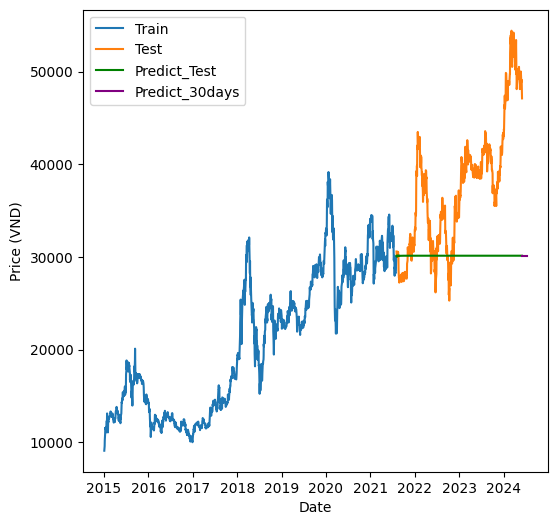

In [187]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='purple')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.show()

In [188]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 9997.081
MAE: 7875.997
MAPE: 18.914


## Arima for CTG dataset

In [189]:
data_path = '../../Dataset/CTG.csv';

In [190]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [191]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2345 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB
None
              Close
count   2345.000000
mean   19510.971566
std     7060.095727
min     9637.772461
25%    13451.279297
50%    16606.089844
75%    25729.027344
max    37719.050781


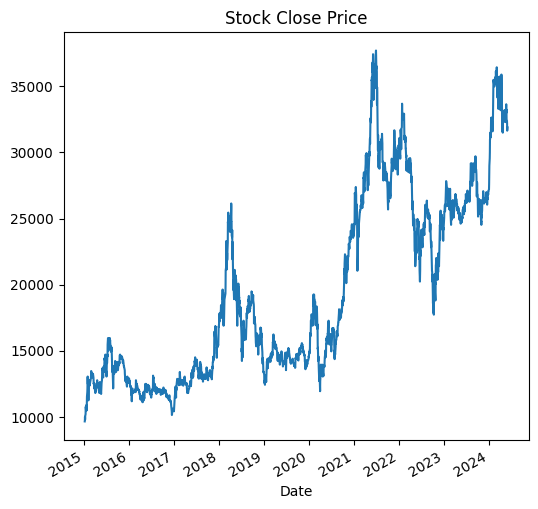

In [192]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [193]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [194]:
train_data

,Close
Date,
2015-01-05,9637.772461
2015-01-06,9707.109375
2015-01-07,9984.455078
2015-01-08,9776.445312
2015-01-09,10053.791992
...,...
2021-07-27,29084.986328
2021-07-28,29442.955078
2021-07-29,30337.878906


In [195]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1641, 1)
Test set shape: (704, 1)


In [196]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -1.3022211165237332
Initial p-value: 0.6281555385005244
Differencing Level: 1
ADF Statistic: -51.10753306643303
p-value: 0.0
Series became stationary after 1 differencing levels.


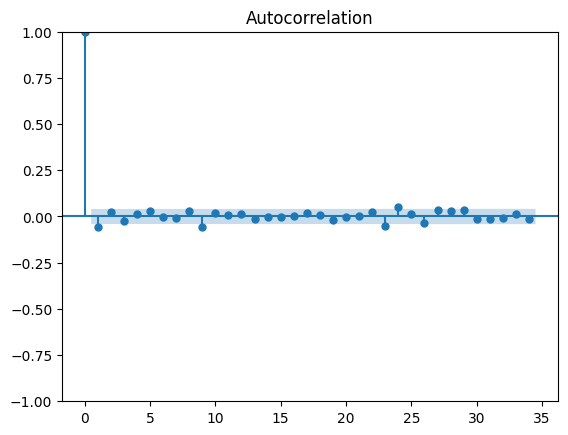

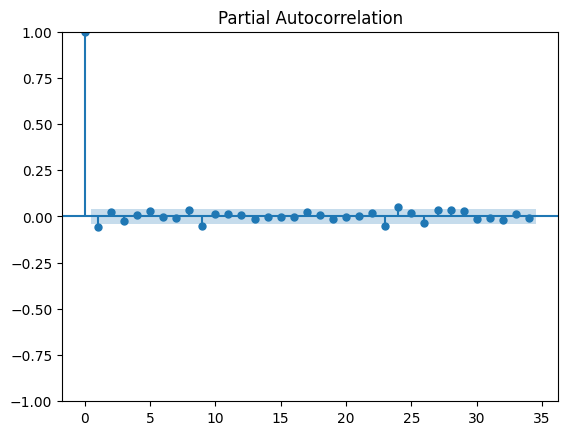

In [197]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [198]:
model = ARIMA(train_data, order=(3, 1, 3))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [199]:
model_fit = model.fit()

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [200]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1641
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -12202.828
Date:                Thu, 13 Jun 2024   AIC                          24419.656
Time:                        22:49:31   BIC                          24457.473
Sample:                             0   HQIC                         24433.681
                               - 1641                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0775      1.656     -0.047      0.963      -3.323       3.168
ar.L2          0.7938      0.202      3.925      0.000       0.397       1.190
ar.L3         -0.0375      1.378     -0.027      0.9

In [201]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [202]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_13224\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2021-08-03,30516.863281,30217.047072
2021-08-04,30427.371094,30227.362778
2021-08-05,30606.355469,30220.502503
2021-08-06,30561.609375,30229.473316
2021-08-09,30919.578125,30222.945667
...,...,...
2024-05-27,32400.000000,30231.073707
2024-05-28,32200.000000,30231.073707
2024-05-29,31650.000000,30231.073707


In [203]:
start = len(data) + 1
end = len(data) + 30
predict_30_days = model_fit.predict(start=start, end=end)
predict_30_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2346    30231.073707
2347    30231.073707
2348    30231.073707
2349    30231.073707
2350    30231.073707
2351    30231.073707
2352    30231.073707
2353    30231.073707
2354    30231.073707
2355    30231.073707
2356    30231.073707
2357    30231.073707
2358    30231.073707
2359    30231.073707
2360    30231.073707
2361    30231.073707
2362    30231.073707
2363    30231.073707
2364    30231.073707
2365    30231.073707
2366    30231.073707
2367    30231.073707
2368    30231.073707
2369    30231.073707
2370    30231.073707
2371    30231.073707
2372    30231.073707
2373    30231.073707
2374    30231.073707
2375    30231.073707
Name: predicted_mean, dtype: float64

In [204]:
predict_60_days = model_fit.predict(start=end, end=end+30)
predict_90_days = model_fit.predict(start=end+30, end=end+60)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [205]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [206]:
predict_30_days = pd.Series(predict_30_days.values, index=generate_date_array(test_data.index[-1], 30))
predict_30_days.index.name = 'Date'
predict_30_days

Date
2024-05-31    30231.073707
2024-06-03    30231.073707
2024-06-04    30231.073707
2024-06-05    30231.073707
2024-06-06    30231.073707
2024-06-07    30231.073707
2024-06-10    30231.073707
2024-06-11    30231.073707
2024-06-12    30231.073707
2024-06-13    30231.073707
2024-06-14    30231.073707
2024-06-17    30231.073707
2024-06-18    30231.073707
2024-06-19    30231.073707
2024-06-20    30231.073707
2024-06-21    30231.073707
2024-06-24    30231.073707
2024-06-25    30231.073707
2024-06-26    30231.073707
2024-06-27    30231.073707
2024-06-28    30231.073707
2024-07-01    30231.073707
2024-07-02    30231.073707
2024-07-03    30231.073707
2024-07-04    30231.073707
2024-07-05    30231.073707
2024-07-08    30231.073707
2024-07-09    30231.073707
2024-07-10    30231.073707
2024-07-11    30231.073707
dtype: float64

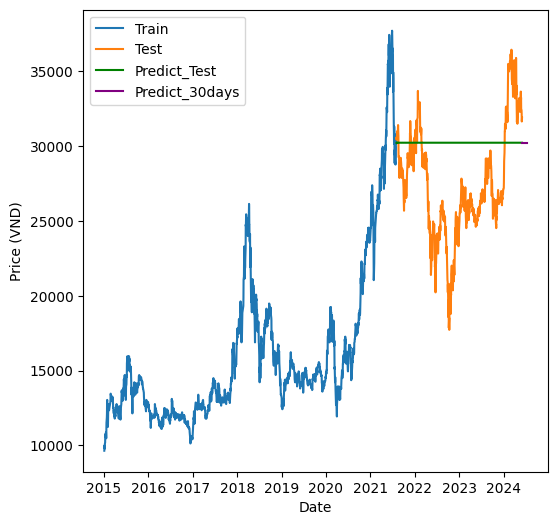

In [207]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='purple')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.show()

In [208]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 4616.384
MAE: 3931.159
MAPE: 15.587
